In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [ ]:
dataset= pd.read_csv("/content/Prostate cancer dataset.csv",header=None)
print(dataset)

In [ ]:
dataset=dataset.dropna(axis=1,how='all')
print(dataset)

In [ ]:
tdataset = dataset.T
print(tdataset)

In [ ]:
tdataset=tdataset.drop(0)

In [ ]:
array=tdataset.values


In [ ]:
x=array[:, 1:]
print(x)
x.shape

In [ ]:
y = array[:, 0]
print(y)
y.shape

In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy="mean")
imputer=imputer.fit(x)
x=imputer.fit_transform(x)
print(x)

In [ ]:
encoder=LabelEncoder()
y = encoder.fit_transform(y)
print(y)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN=KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred=classifier_KNN.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
print(y_test)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[12  2]
 [ 5  7]]


In [ ]:
from sklearn.metrics import accuracy_score
y_score=accuracy_score(y_test,y_pred)
y_score

0.7307692307692307

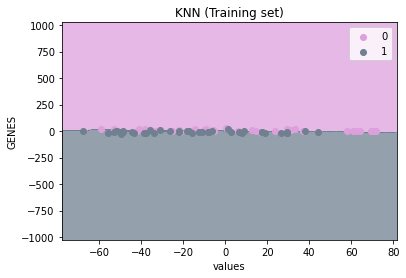

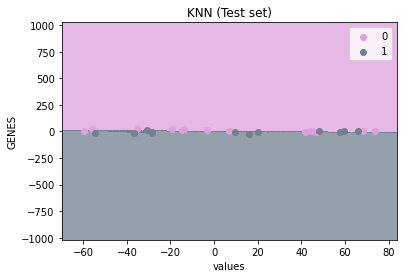

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_KNN.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('plum', 'slategrey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('plum', 'slategrey'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('values')
plt.ylabel('GENES')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier_KNN.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('plum', 'slategrey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('plum', 'slategrey'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('values')
plt.ylabel('GENES')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
classifer_svm=SVC(kernel='linear',random_state=0)
classifer_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_predsvm=classifer_svm.predict(X_test)
print(y_predsvm)

[0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
cmsvm=confusion_matrix(y_test,y_predsvm)
print(cmsvm)

[[12  2]
 [ 5  7]]


In [ ]:
accuracy_score(y_test,y_predsvm)

0.7307692307692307

In [ ]:
#SVM is same as KNN

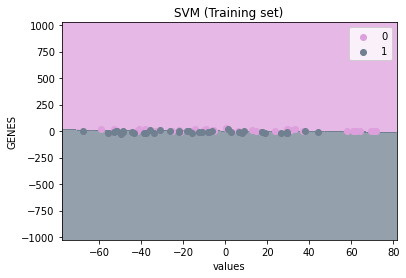

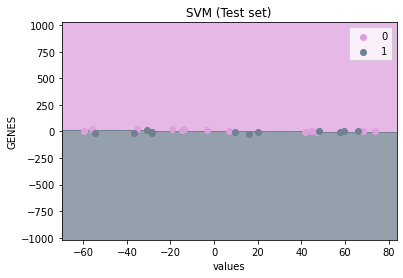

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifer_svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('plum', 'slategrey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('plum', 'slategrey'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('values')
plt.ylabel('GENES')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifer_svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('plum', 'slategrey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('plum', 'slategrey'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('values')
plt.ylabel('GENES')
plt.legend()
plt.show()
